<a href="https://colab.research.google.com/github/jlhenao/SAPUI5/blob/master/Caso_InkInn_U3%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

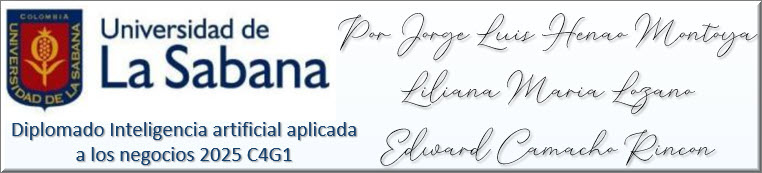

In [52]:
# PASO 1 : Situación y Problemática de RRHH

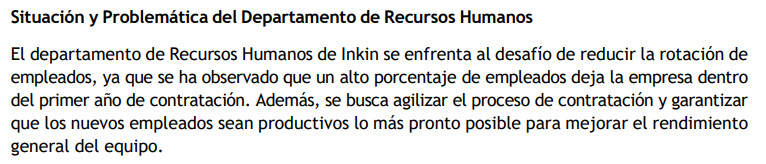

In [53]:
# DATA 1.1 Cant.Cursos VS. Porc.Rotación


In [54]:
# Series relacionadas(1)
import numpy as np
CANT_CURSOS = np.array([6,3,3,21,5,26,27,17,6,2,8,16,7,11,5,10,11,35,11,11,12,13,13,15,17,16,34,22,18,18,21,9,30,22,23,23,25,25,3,33,26,26,32,29,28,31,29,29,9,30,8,31,31,32,7,33,26,8], dtype=float)
PORC_ROTAC = np.array([29,31,30,12,29,15,13,18,29,30,24,10,32,21,29,21,23,3,26,22,24,20,20,24,19,14,2,15,12,15,13,22,3,11,10,13,12,18,28,6,10,17,7,16,12,4,13,12,25,5,21,6,4,6,28,7,14,24], dtype=float)

# TensorFlow espera X como matriz de 2 dimensiones
cc = CANT_CURSOS.reshape(-1, 1)
pr = PORC_ROTAC.reshape(-1, 1)


[]

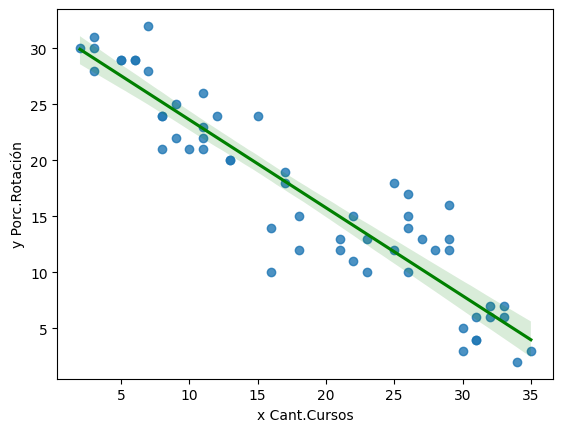

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.regplot(x=CANT_CURSOS, y=PORC_ROTAC,line_kws={"color": "green"} )
plt.xlabel("x Cant.Cursos")
plt.ylabel("y Porc.Rotación")
plt.plot()

In [56]:
# El GRAFICO DE DISPERSION muestra una tendencia LINEAL decreciente o inversa,
# mientras más CURSOS, hay menos ROTACION de Personal

In [57]:
# DATA 1.2 Días Prom.Contratación vs. Porc.Productividad

In [58]:
# Series relacionadas(2)
DIAS_P_CONTR = np.array([
20,24,20,24,23,24,27,25,22,12,27,26,14,28,26,26,26,23,15,11,27,26,29,26,26,22,
20,16,32,30,28,27,23,22,14,11,34,26,25,24,21,31,29,29,28,12,18,16,13,33,28,28,
28,16,15,13,15,35,28,15,13,29,20,14,12,11,11,32,15,14,11,11,16,16,15,14,34,14,
12,12,32,15,17,13,16,19,15,15,13,18,10,10,18,17,20,15,10,10,10,10,10,18,19
] , dtype=float)
PORC_PRODUC = np.array([
5,2,6,3,4,4,2,4,7,17,4,5,17,4,6,6,6,9,17,21,6,7,5,8,8,12,14,18,3,5,7,8,12,13,
21,24,2,10,11,12,15,6,9,9,10,26,21,23,26,7,12,12,12,24,25,27,26,7,14,27,29,14,
23,29,31,32,32,12,29,30,33,33,29,29,30,31,12,32,34,34,15,32,31,35,33,32,37,38,
41,38,46,46,39,40,38,43,48,50,50,50,50,44,45
] , dtype=float)

[]

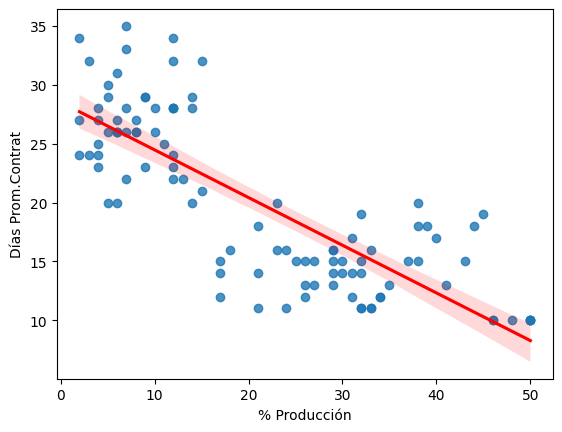

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.regplot(x=PORC_PRODUC, y=DIAS_P_CONTR, line_kws={"color": "red"})
plt.ylabel("Días Prom.Contrat")
plt.xlabel("% Producción")
plt.plot()

In [60]:
# El GRAFICO DE DISPERSION muestra una tendencia LINEAL decreciente o inversa,
# El % DE PRODUCCION aumenta a medida que bajan los DIAS PROM.CONTRATACION

In [61]:
# PASO 2 : Preguntas para el Departamento de RRHH

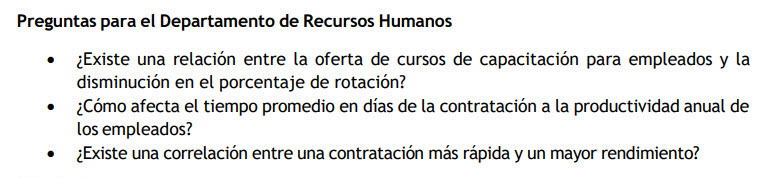

In [62]:
# 1. Relación OFERTA DE CURSOS vs. ROTACION DE PERSONAL : existe de manera inversa
#    (a mayor número de Cursos menor será la ROTACION DE PERSONAL)
# 2. DIAS DE CONTRATACION vs. PRODUCTIVIDAD : Mientras más tiempo dure un proceso de
#    contratación la productividad se afecta de manera inversa (más dias, menos
#    productividad)
# 3. Menos tiempo en contratación redunda en un mayor rendimiento del personal

Iniciando Entrenamiento CANT_CURSOS vs. PORC_ROTAC
Modelo [CC x PR] Entrenado exitosamente


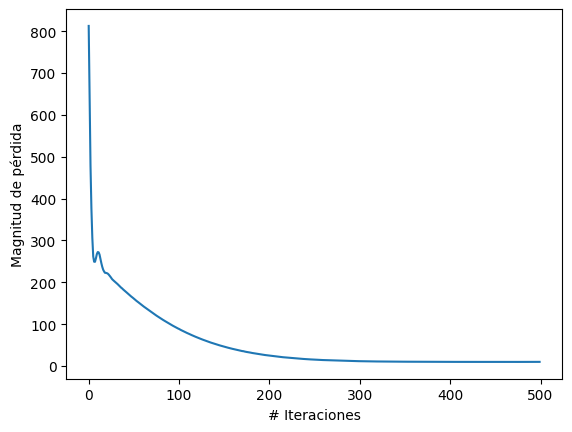

In [63]:
import numpy      as np
import tensorflow as tf

# 1. Datos (ya cargados en Paso 1)
cc = np.array(CANT_CURSOS, dtype=np.float32).reshape(-1, 1)  # feature
pr = np.array(PORC_ROTAC,  dtype=np.float32).reshape(-1, 1)  # target

modelo_cc_pr = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),   # ✅ Entrada explícita
    tf.keras.layers.Dense(units=1)       # Capa densa
])

# 2. Compilación del Modelo
modelo_cc_pr.compile(
   optimizer=tf.keras.optimizers.Adam(0.1),  # Corregido el valor del learning rate
   loss='mean_squared_error'
)

# 3. Entrenamiento del Modelo CANT_CURSOS vs PORC_ROTAC
print("Iniciando Entrenamiento CANT_CURSOS vs. PORC_ROTAC")
model_cc_pr  = modelo_cc_pr.fit(cc, pr, epochs=500, verbose=False)
print("Modelo [CC x PR] Entrenado exitosamente")

# 4. Análisis de Datos
import matplotlib.pyplot as plt
plt.xlabel("# Iteraciones")
plt.ylabel("Magnitud de pérdida")

#plt.plot(historial.history["loss"])
plt.plot(model_cc_pr.history["loss"])
plt.show()


In [64]:
# ENTRENAMIENTO Dias de Contratación vs. Porcentaje de Productividad

Iniciando Entrenamiento DIAS_P_CONTR vs. PORC_PRODUC
Modelo [DP x PP] Entrenado exitosamente


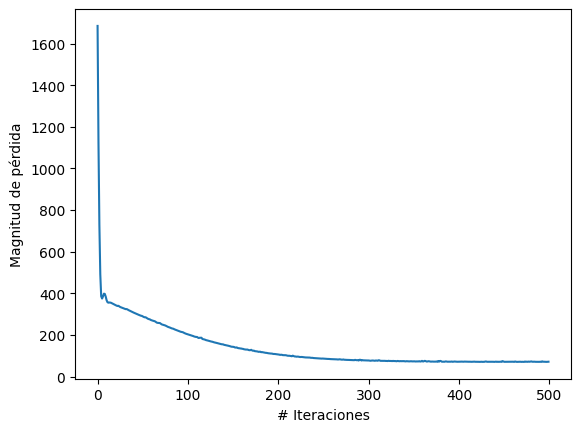

In [65]:
import numpy      as np
import tensorflow as tf

# 1. Datos (ya cargados en Paso 1)
dp = np.array(DIAS_P_CONTR, dtype=np.float32).reshape(-1, 1)  # feature
pp = np.array(PORC_PRODUC,  dtype=np.float32).reshape(-1, 1)  # target

modelo_dp_pp = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),   # ✅ Entrada explícita
    tf.keras.layers.Dense(units=1)       # Capa densa
])

# 2. Compilación del Modelo
modelo_dp_pp.compile(
   optimizer=tf.keras.optimizers.Adam(0.1),  # Corregido el valor del learning rate
   loss='mean_squared_error'
)

# 3. Entrenamiento del Modelo CANT_CURSOS vs PORC_ROTAC
print("Iniciando Entrenamiento DIAS_P_CONTR vs. PORC_PRODUC")
model_dp_pp  = modelo_dp_pp.fit(dp, pp, epochs=500, verbose=False)
print("Modelo [DP x PP] Entrenado exitosamente")

# 4. Análisis de Datos
import matplotlib.pyplot as plt
plt.xlabel("# Iteraciones")
plt.ylabel("Magnitud de pérdida")

#plt.plot(historial.history["loss"])
plt.plot(model_dp_pp.history["loss"])
plt.show()

In [66]:
# PASO 6. PREDICCION Cantidad de Cursos vs. Porcentaje Rotación

dato = np.array([[30]])
print("Si realizamos " + str(dato.item()) +  " cursos, de cuanto se espera el % de Rotación?")
resultado = modelo_cc_pr.predict(dato)
print(" Para " + str(dato.item()) + " Cursos, se espera una Rotación de " + str(resultado.item()) + "%")

Si realizamos 30 cursos, de cuanto se espera el % de Rotación?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
 Para 30 Cursos, se espera una Rotación de 7.751089096069336%


In [67]:
# PASO 7. PREDICCION Dias de Contratación vs. % de Producción
dato = np.array([[30]])
print("Tardando " + str(dato.item()) + " días en contratación, de cuanto se espera la Producción?")
resultado = modelo_dp_pp.predict(dato)
print(" Para " + str(dato.item()) + " dias de Contratación, se espera una Producción del " + str(resultado.item()) + "%" )

Tardando 30 días en contratación, de cuanto se espera la Producción?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
 Para 30 dias de Contratación, se espera una Producción del 4.357242584228516%


In [68]:
# PASO 7. ESTRATEGIAS


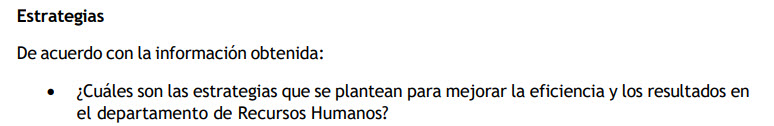

Estrategias a Implementar : Para ambos casos se observa que hay una relación directa fruto de las gráficas y de los test realizados a los modelos. De ese modo podemos implementar : [A] Aumentar el número de cursos o capacitaciones en busca de disminuir la Rotación de personal. Se infiere que los cursos resultan atractivos para los empleados al momento de tomar la decisión de seguir en la empresa. [B] Agilizar los procesos de contratación pues la demora puede ser la causante de una baja productividad en los contratados.texto en negrita